In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#generate random data for this example
#for finding who can run for "Boston Marathon Race"

mean1 = 50
std_dev1 = 10
num_samples = 500

column1_numbers = np.random.normal(mean1,std_dev1,num_samples)
column1_numbers = np.clip(column1_numbers,30,120)
column1_numbers = np.round(column1_numbers).astype(int)

mean2 = 18
std_dev2 = 3

column2_numbers = np.random.normal(mean2,std_dev2,num_samples)
column2_numbers = np.clip(column2_numbers,12,26)
column2_numbers = np.round(column2_numbers).astype(int)

column3_numbers = np.random.randint(2,size=num_samples)
column3_numbers[column1_numbers > mean1] = 1

data = {'Miles per week':column1_numbers,
        'Farthest run' : column2_numbers,
        'Qualified Boston Marathon' : column3_numbers}

df = pd.DataFrame(data)
df

,Miles per week,Farthest run,Qualified Boston Marathon
0,56,22,1
1,48,17,0
2,55,18,1
3,40,16,0
4,32,19,0
...,...,...,...
495,30,23,1
496,54,23,1
497,56,19,1
498,42,23,0


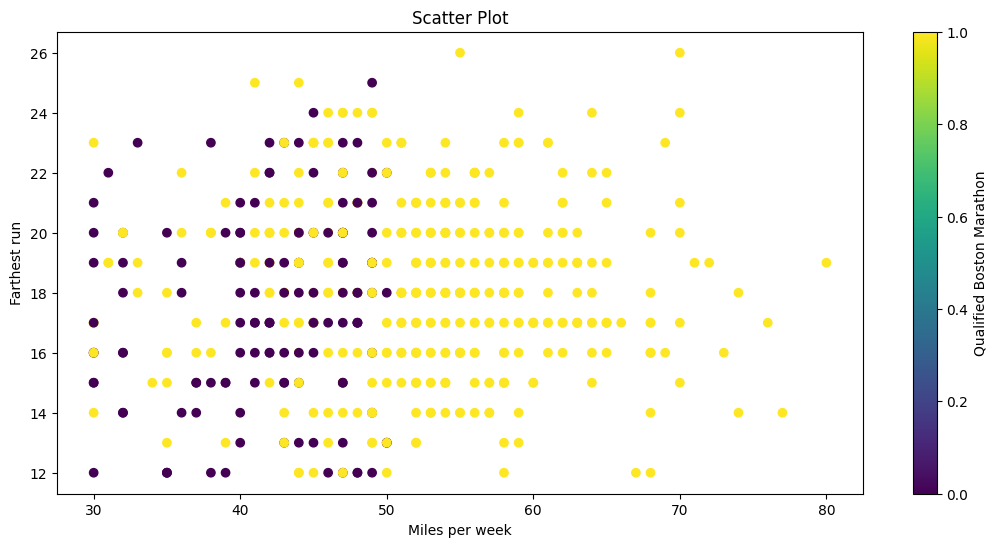

In [3]:
plt.figure(figsize = (13,6))
plt.scatter(df['Miles per week'],df['Farthest run'],c = df['Qualified Boston Marathon'],cmap='viridis')
plt.xlabel('Miles per week')
plt.ylabel('Farthest run')
plt.title('Scatter Plot')
plt.colorbar(label='Qualified Boston Marathon')
plt.show()

In [4]:
X = df.iloc[:,0:2]

In [5]:
y = df.iloc[:,2]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=33,test_size=0.2)

In [8]:
from sklearn.svm import SVC

In [9]:
model = SVC()

In [10]:
model.fit(X_train,y_train)

SVC()

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
y_pred = model.predict(X_test)

In [13]:
print(confusion_matrix(y_test,y_pred))

[[ 9 14]
 [ 5 72]]


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.39      0.49        23
           1       0.84      0.94      0.88        77

    accuracy                           0.81       100
   macro avg       0.74      0.66      0.68       100
weighted avg       0.79      0.81      0.79       100



In [15]:
model.score(X_test,y_test)

0.81

In [16]:
#regularization

In [17]:
model_reg0 = SVC(C=0.1)

In [18]:
model_reg0.fit(X_train,y_train)

SVC(C=0.1)

In [19]:
model_reg0.score(X_test,y_test)

0.77

In [20]:
model_reg0 = SVC(C=1000)
model_reg0.fit(X_train,y_train)
model_reg0.score(X_test,y_test)

0.8

In [21]:
#gamma

In [22]:
model_gamma0 = SVC(gamma=0.1)
model_gamma0.fit(X_train,y_train)
model_gamma0.score(X_test,y_test)

0.83

In [23]:
model_gamma1 = SVC(gamma=1)
model_gamma1.fit(X_train,y_train)
model_gamma1.score(X_test,y_test)

0.83

In [24]:
model_gamma2 = SVC(gamma=1000)
model_gamma2.fit(X_train,y_train)
model_gamma2.score(X_test,y_test)

0.81

In [25]:
#kernels

In [26]:
model_linear = SVC(kernel = 'linear')
model_linear.fit(X_train,y_train)
model_linear.score(X_test,y_test)

0.8

In [27]:
model_rbf = SVC(kernel = 'rbf')
model_rbf.fit(X_train,y_train)
model_rbf.score(X_test,y_test)

0.81

In [28]:
#adding paramaters

In [29]:
param_grid  = {
    'C' : [0.1,1,10,1000],
    'gamma' : [0.1,1,10,1000],
    'kernel' : ['linear','rbf','sigmoid']
}

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
grid_search = GridSearchCV(model,param_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [32]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 1000], 'gamma': [0.1, 1, 10, 1000],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [33]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [34]:
grid_search.best_score_

np.float64(0.7649999999999999)